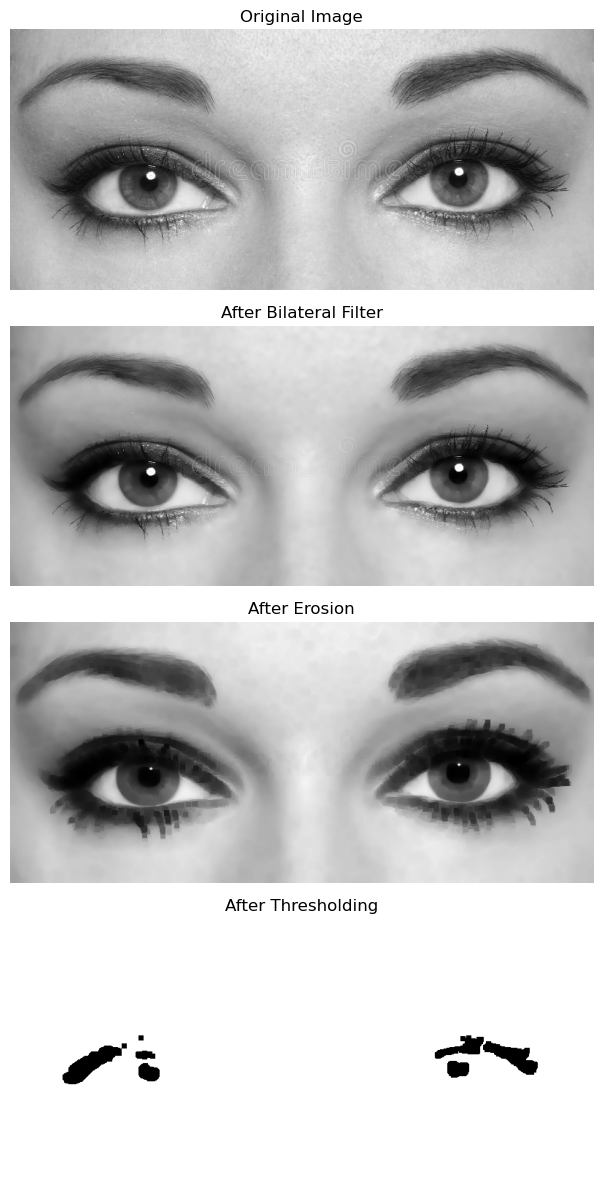

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


eye_image_path = 'cx.jpeg'  


eye_image = cv2.imread(eye_image_path, cv2.IMREAD_GRAYSCALE)


if eye_image is None:
    raise ValueError(f"Error: Unable to load the image from path {eye_image_path}. Please check the file path.")


threshold_value = 30


def image_processing(eye_frame, threshold):
    kernel = np.ones((3, 3), np.uint8)  
    
    
    filtered_frame = cv2.bilateralFilter(eye_frame, 10, 15, 15)
    
   
    eroded_frame = cv2.erode(filtered_frame, kernel, iterations=3)
    
    
    thresholded_frame = cv2.threshold(eroded_frame, threshold, 255, cv2.THRESH_BINARY)[1]

    return filtered_frame, eroded_frame, thresholded_frame


filtered_image, eroded_image, thresholded_image = image_processing(eye_image, threshold_value)


plt.figure(figsize=(7, 12))  


plt.subplot(4, 1, 1)
plt.imshow(eye_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')


plt.subplot(4, 1, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('After Bilateral Filter')
plt.axis('off')


plt.subplot(4, 1, 3)
plt.imshow(eroded_image, cmap='gray')
plt.title('After Erosion')
plt.axis('off')


plt.subplot(4, 1, 4)
plt.imshow(thresholded_image, cmap='gray')
plt.title('After Thresholding')
plt.axis('off')

plt.tight_layout()
plt.show()


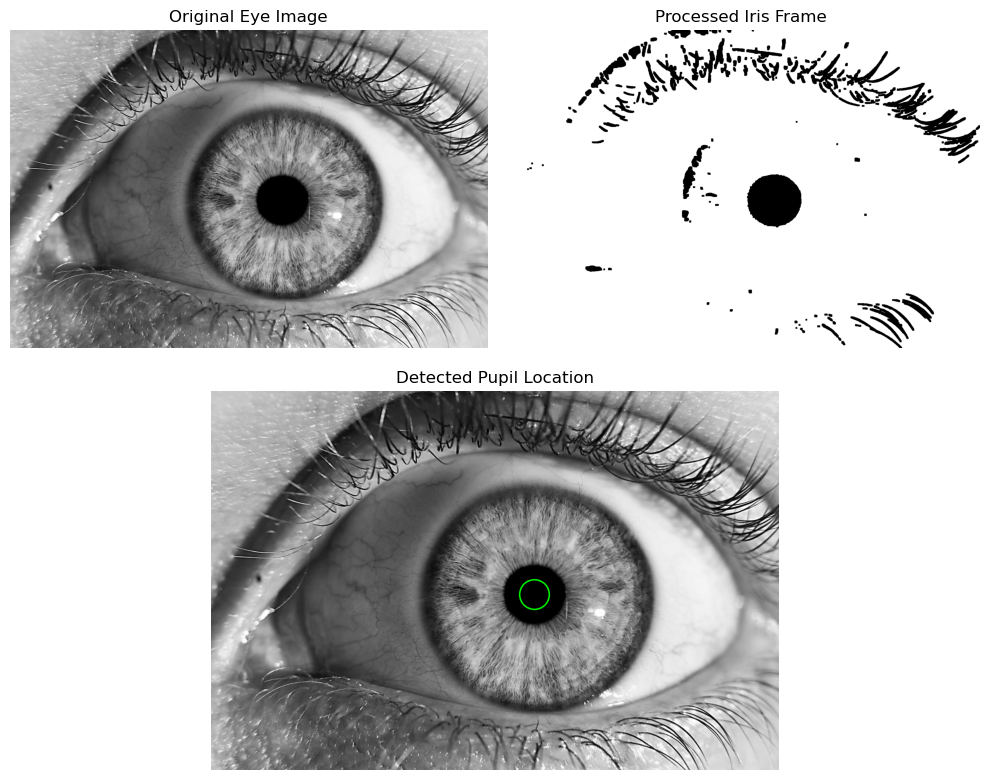

In [74]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


eye_image_path = 'R.jpeg'  
eye_image = cv2.imread(eye_image_path, cv2.IMREAD_GRAYSCALE)


if eye_image is None:
    raise ValueError(f"Error: Unable to load the image from path {eye_image_path}. Please check the file path.")


threshold_value = 30

def image_processing(eye_frame, threshold):
    """Performs operations on the eye frame to isolate the iris."""
    kernel = np.ones((3, 3), np.uint8)
    
  
    filtered_frame = cv2.bilateralFilter(eye_frame, 10, 15, 15)
    

    eroded_frame = cv2.erode(filtered_frame, kernel, iterations=3)
    

    thresholded_frame = cv2.threshold(eroded_frame, threshold, 255, cv2.THRESH_BINARY)[1]

    return thresholded_frame


iris_frame = image_processing(eye_image, threshold_value)


contours, _ = cv2.findContours(iris_frame, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)[-2:]
contours = sorted(contours, key=cv2.contourArea)  


pupil_x, pupil_y = None, None

try:
    
    moments = cv2.moments(contours[-2])
    pupil_x = int(moments['m10'] / moments['m00'])
    pupil_y = int(moments['m01'] / moments['m00'])
except (IndexError, ZeroDivisionError):
    print("No contours found or moments calculation failed.")


output_image = cv2.cvtColor(eye_image, cv2.COLOR_GRAY2BGR)


if pupil_x is not None and pupil_y is not None:
    cv2.circle(output_image, (pupil_x, pupil_y), 50, (1, 255, 1), 3)  


plt.figure(figsize=(10, 8))


plt.subplot(2, 2, 1)
plt.imshow(eye_image, cmap='gray')
plt.title('Original Eye Image')
plt.axis('off')


plt.subplot(2, 2, 2)
plt.imshow(iris_frame, cmap='gray')
plt.title('Processed Iris Frame')
plt.axis('off')


plt.subplot(2, 1, 2)
plt.imshow(output_image)
plt.title('Detected Pupil Location')
plt.axis('off')

plt.tight_layout()
plt.show()


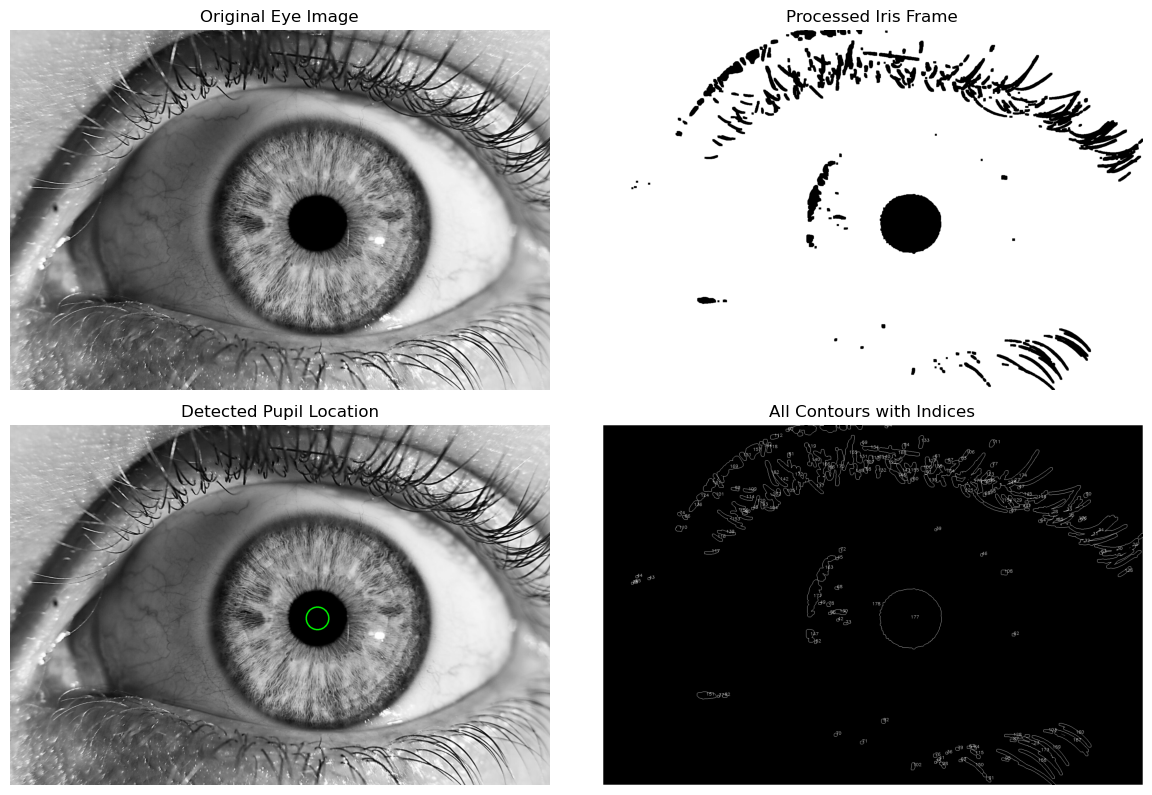

Detected pupil coordinates: (1093, 687)


In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


eye_image_path = 'R.jpeg'  
eye_image = cv2.imread(eye_image_path, cv2.IMREAD_GRAYSCALE)


if eye_image is None:
    raise ValueError(f"Error: Unable to load the image from path {eye_image_path}. Please check the file path.")


threshold_value = 30

def image_processing(eye_frame, threshold):
    """Performs operations on the eye frame to isolate the iris."""
    kernel = np.ones((3, 3), np.uint8)
    

    filtered_frame = cv2.bilateralFilter(eye_frame, 10, 15, 15)
    

    eroded_frame = cv2.erode(filtered_frame, kernel, iterations=3)
    
  
    thresholded_frame = cv2.threshold(eroded_frame, threshold, 255, cv2.THRESH_BINARY)[1]

    return thresholded_frame


iris_frame = image_processing(eye_image, threshold_value)


contours, _ = cv2.findContours(iris_frame, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)


contours = sorted(contours, key=cv2.contourArea)


output_image = cv2.cvtColor(eye_image, cv2.COLOR_GRAY2BGR)


pupil_x, pupil_y = None, None

try:
    
    moments = cv2.moments(contours[-2])
    pupil_x = int(moments['m10'] / moments['m00'])
    pupil_y = int(moments['m01'] / moments['m00'])
except (IndexError, ZeroDivisionError):
    print("No contours found or moments calculation failed.")


if pupil_x is not None and pupil_y is not None:
    cv2.circle(output_image, (pupil_x, pupil_y), 40, (0, 255, 0), 4)  


contours_image = np.zeros_like(output_image)  
for i, contour in enumerate(contours):

    cv2.drawContours(contours_image, contours, i, (255, 255, 255), 1)

    M = cv2.moments(contour)
    if M['m00'] != 0:  
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])

        cv2.putText(contours_image, str(i), (cx, cy), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255), 1)


plt.figure(figsize=(12, 12))


plt.subplot(3, 2, 1)
plt.imshow(eye_image, cmap='gray')
plt.title('Original Eye Image')
plt.axis('off')


plt.subplot(3, 2, 2)
plt.imshow(iris_frame, cmap='gray')
plt.title('Processed Iris Frame')
plt.axis('off')


plt.subplot(3, 2, 3)
plt.imshow(output_image)
plt.title('Detected Pupil Location')
plt.axis('off')


plt.subplot(3, 2, 4)
plt.imshow(contours_image)
plt.title('All Contours with Indices')
plt.axis('off')

plt.tight_layout()
plt.show()


if pupil_x is not None and pupil_y is not None:
    print(f"Detected pupil coordinates: ({pupil_x}, {pupil_y})")
else:
    print("No pupil detected.")
